# Tutorial 11
# Hierarchical Clustering

The following Python code utilizes agglomerative clustering to cluster the customers as Careful, Standard, Target, Careless, and Sensible using Mall_Customers data available on Moodle and standard scikit-learn library APIs. Customers’ dendrogram is plotted against the Euclidean distance. In addition, the clusters are plotted in a scatter plot to show five different customer groups.

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
!pip install plotly
# install plotly package before the execution of the next cell

In [13]:
from plotly.figure_factory import create_dendrogram 
import numpy as np 
  
X = np.random.rand(5, 5) 
names = ['Jack', 'Oxana', 'John', 'Chelsea', 'Mark'] 
  
dendro = create_dendrogram(X, orientation = 'bottom', labels = names) 
dendro.update_layout({'width':600, 'height':500})  
dendro.show()
names, X

(['Jack', 'Oxana', 'John', 'Chelsea', 'Mark'],
 array([[0.62979971, 0.08152417, 0.18035403, 0.56536622, 0.46141337],
        [0.55780662, 0.45437251, 0.93037092, 0.12284109, 0.97636185],
        [0.26067074, 0.93049855, 0.78556511, 0.5244745 , 0.83054911],
        [0.8014934 , 0.31235301, 0.87702741, 0.49233747, 0.4802449 ],
        [0.41860868, 0.37945081, 0.33830737, 0.20597421, 0.4547457 ]]))

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Given data
names = ['Jack', 'Oxana', 'John', 'Chelsea', 'Mark']
data = np.array([
        [0.79665604, 0.3382481 , 0.55822122, 0.5522951 , 0.41617609],
        [0.03457513, 0.65549955, 0.06434499, 0.39901503, 0.81496396],
        [0.65154879, 0.97058038, 0.56676127, 0.68236875, 0.0683803 ],
        [0.20672071, 0.04759919, 0.39692886, 0.89641756, 0.40695175],
        [0.57392101, 0.58590424, 0.50931587, 0.02115813, 0.88010742]
])

# Create a DataFrame with the data
data_df = pd.DataFrame(data, columns=names)

# Calculate pairwise distance
pairwise_distance = sch.distance.pdist(data)

pairwise_distance

array([1.05254742, 0.74756553, 0.75961903, 0.78145694, 1.17048325,
       0.96107867, 0.80047241, 1.11312931, 1.11955446, 1.1946525 ])

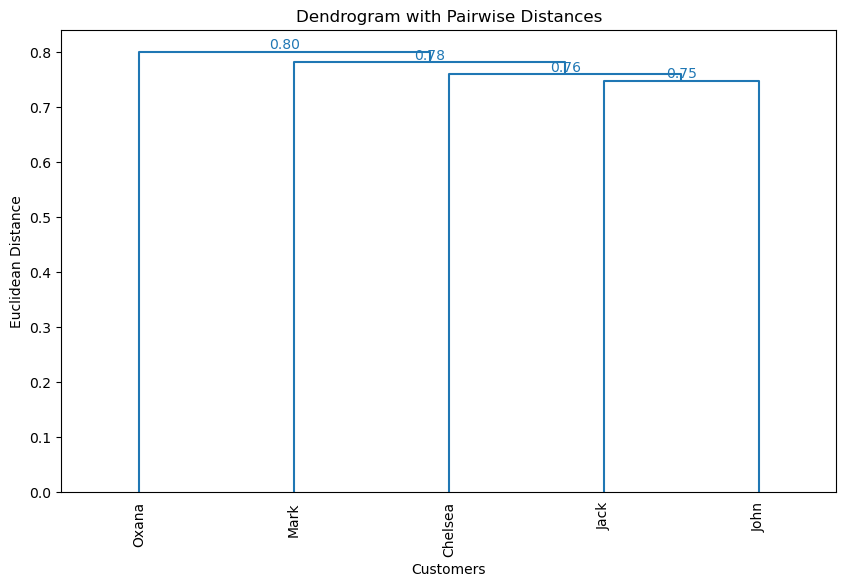

In [14]:
# Create the dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(data_df.values, method='single'), labels=names, leaf_rotation=90, leaf_font_size=10)

# Add distances to the dendrogram
for i, d, c in zip(dendrogram['icoord'], dendrogram['dcoord'], dendrogram['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    plt.text(x, y, f'{d[2]:.2f}', verticalalignment='bottom', horizontalalignment='center', fontsize=10, color=c)

plt.title('Dendrogram with Pairwise Distances')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()


In [6]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [25]:
# ======================================================================
# Agglomerative clustering example
# ======================================================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('Mall_Customers.csv')

# Consider two attributes from the dataset 'Mall_Customers.csv', such as Age and Annual Income.
# 1 means Age and 2 means Annual Income(k$)
X = dataset.iloc[:, [2, 3]].values  

# Display first 5 records
dataset.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre
0,1,19,15,39,Male
1,2,21,15,81,Male
2,3,20,16,6,Female
3,4,23,16,77,Female
4,5,31,17,40,Female


In [26]:
# Display an array of only two columns
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

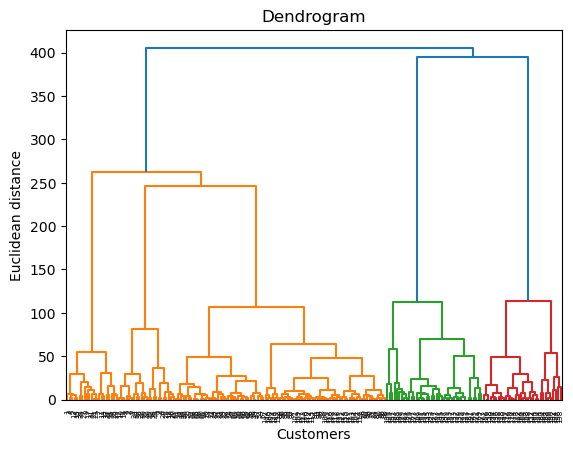

In [27]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Generate some random data (replace this with your data)
#X = np.random.rand(20, 5)

# Call the method dendrogram by using an object sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
# dendrogram = sch.dendrogram(sch.linkage(X, method='complete'), truncate_mode='lastp', p = 20)

# Add title and labels
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')

# Show the plot
plt.show()


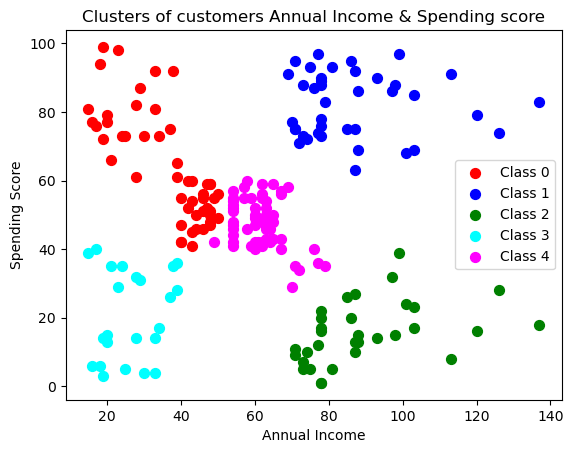

In [28]:
# import the library for Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# Initialise an object 'hc' by calling a method 'AgglomerativeClustering'
hc = AgglomerativeClustering(n_clusters = 5, metric = 'manhattan', linkage = 'complete')

# Train the model by calling a method 'fit_predict(X)'
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Class 0')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Class 1')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Class 2')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Class 3')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Class 4')
plt.title('Clusters of customers Annual Income & Spending score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## Perform hierarchical clustering on the dataset, 'Wholesale_customers_data.csv'

In [29]:
# Load the dataset
data = pd.read_csv('Wholesale_customers_data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


There are multiple product categories – Fresh, Milk, Grocery, etc. The values represent the number of units purchased by each client for each product. Our aim is to make clusters from this data that can segment similar clients together.

We normalize the data before applying Hierarchical Clustering. So that the scale of each variable is the same. So, let’s first normalize the data and bring all the variables to the same scale.

In [37]:
from sklearn.preprocessing import normalize

# Call normalize method to scale the data
data_scaled = data

# Convert scaled data into dataframe
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)

# Display the scaled data
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


It is clear that the scale of all the variables is almost similar. Now, we are good to go. Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem:

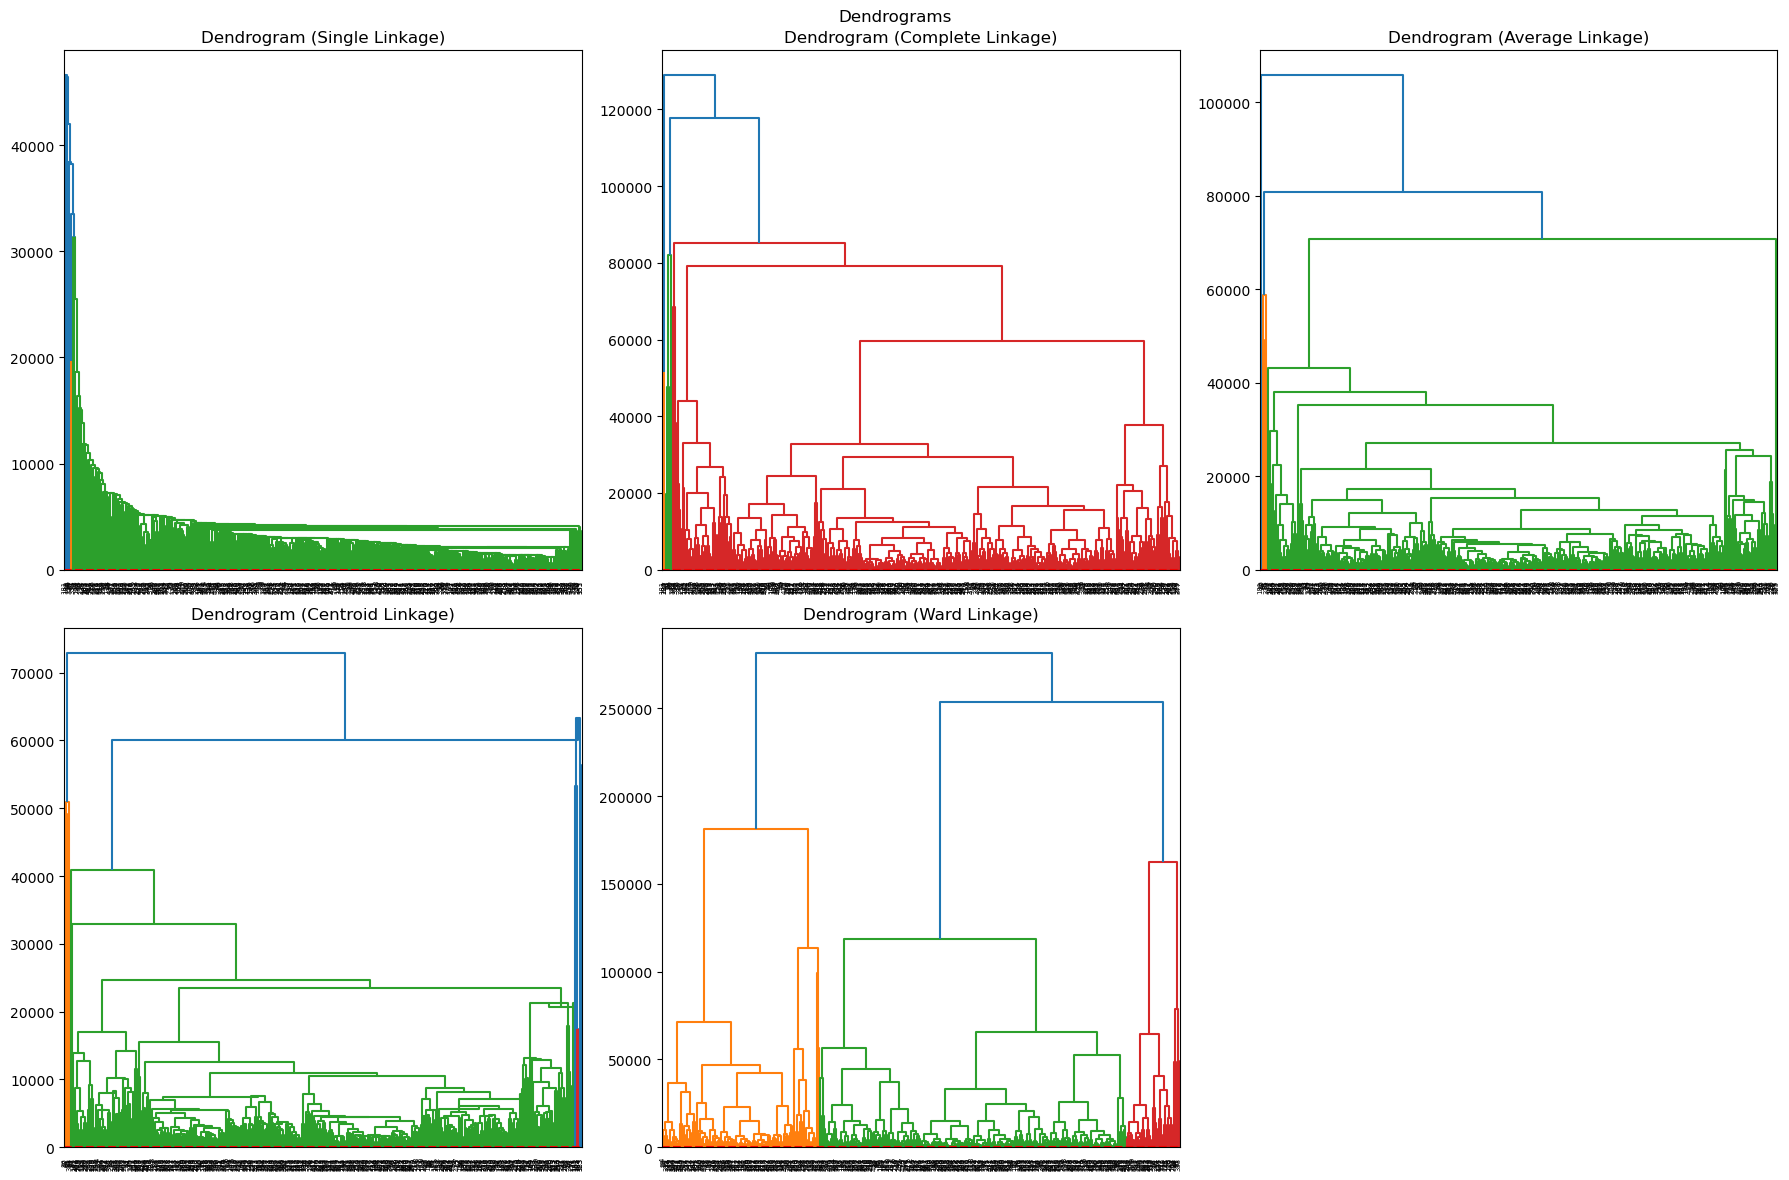

Optimal number of clusters:
Single Linkage: 6 clusters
Complete Linkage: 2 clusters
Average Linkage: 2 clusters
Centroid Linkage: 5 clusters
Ward Linkage: 2 clusters


In [38]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Initialize the linkage methods
methods = ['single', 'complete', 'average', 'centroid', 'ward']

# Size of the figure
plt.figure(figsize=(18, 12))  

# Title of the Dendrogram
plt.suptitle("Dendrograms")

# Initialize dictionary to store optimal number of clusters for each method
optimal_clusters = {}

# Loop through each linkage method
for i, method in enumerate(methods, 1):
    # Create subplot
    plt.subplot(2, 3, i)
    # Call the method dendrogram by using an object (shc)
    dend = shc.dendrogram(shc.linkage(data_scaled, method=method))
    # Set title
    plt.title(f"Dendrogram ({method.capitalize()} Linkage)")
    # Draw the red line to cut the dendrogram
    plt.axhline(y=6, color='r', linestyle='--')
    
    # Find the optimal number of clusters using the Elbow Method
    distances = dend['dcoord']
    max_distance = max(distances, key=lambda x: x[1])[1]
    optimal_clusters[method] = sum(d[1] > 0.7 * max_distance for d in distances)

plt.tight_layout()
plt.show()

print("Optimal number of clusters:")
for method, clusters in optimal_clusters.items():
    print(f"{method.capitalize()} Linkage: {clusters} clusters")


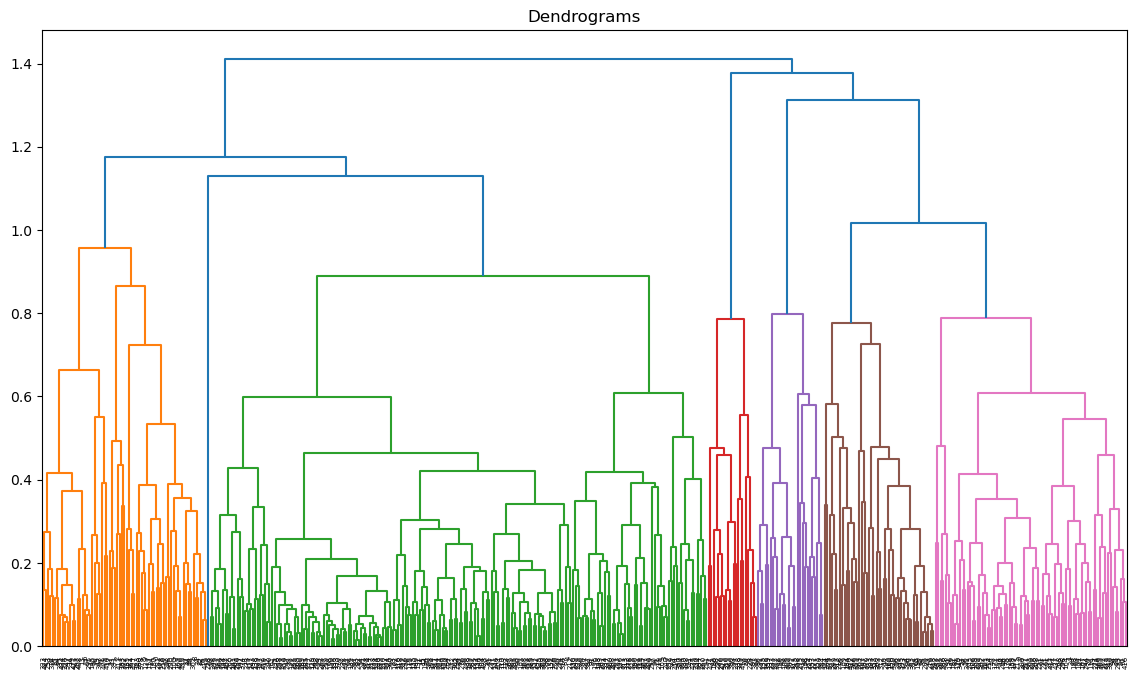

In [14]:
import scipy.cluster.hierarchy as shc

# Size of the figure
plt.figure(figsize=(14, 8))  

# Title of the Dendrogram
plt.title("Dendrograms")

# Call the method dendrogram by using an object (shc)
dend = shc.dendrogram(shc.linkage(data_scaled, method = 'complete'))

# Draw the red line to cut the dendrogram
plt.axhline(y = 6, color = 'r', linestyle = '--')

In [39]:
from sklearn.cluster import AgglomerativeClustering

# Initilise the cluster using a method AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  

# Call the method for the training
cluster.fit_predict(data_scaled)

array([2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2,
       3, 2, 3, 3, 2, 3, 0, 1, 3, 2, 3, 3, 2, 2, 3, 2, 0, 1, 3, 3, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 3, 2, 0, 2, 3, 2, 2, 0, 2, 2, 2, 0,
       2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 0, 2, 2, 2, 2, 2, 3, 2, 0, 0, 1,
       2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 2, 2, 2, 0,
       2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 1, 1, 3, 3, 2, 1, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 0, 2, 2, 2, 3, 3, 2, 3, 2,
       2, 0, 2, 3, 2, 2, 2, 3, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 0, 2, 3, 3, 2,
       2, 2, 0, 0, 3, 2, 2, 0, 2, 2, 2, 0, 3, 0, 2, 2, 2, 2, 0, 3, 2, 2,
       3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 1, 3, 3,
       3, 2, 2, 2, 2, 3, 3, 2, 2, 0, 2, 3, 2, 3, 2, 2, 1, 1, 2, 2, 3, 2,
       2, 2, 0, 3, 2, 3, 2, 2, 2, 1, 2, 2, 3, 2, 2, 3, 2, 2, 1, 3, 1, 1,
       2, 3, 3, 1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3,

We can see the values of 0s and 1s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. Let’s now visualize the two clusters:

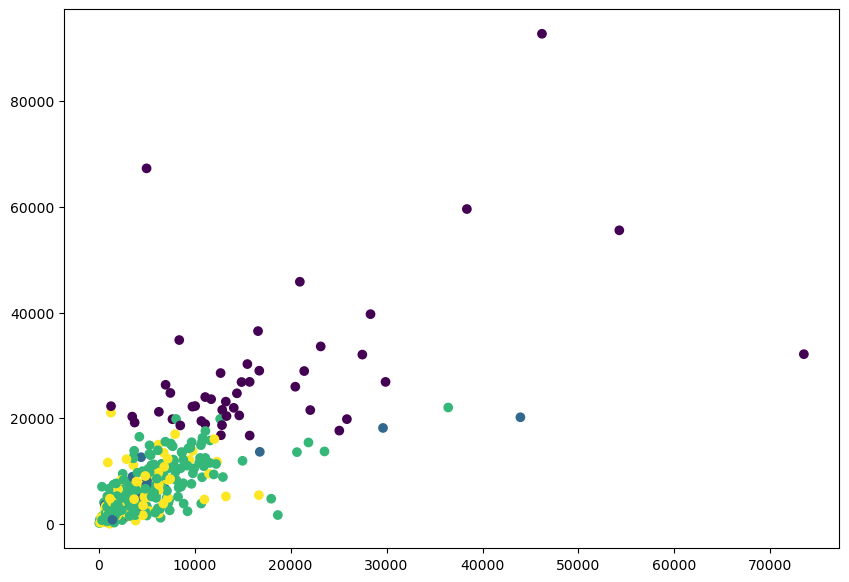

In [40]:
# Set the size of the figure 
plt.figure(figsize=(10, 7))

# Display scatter plot based on the data_scaled
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c = cluster.labels_) 

Therefore, we can clearly visualize the two clusters here. This is how we can implement hierarchical clustering in Python.

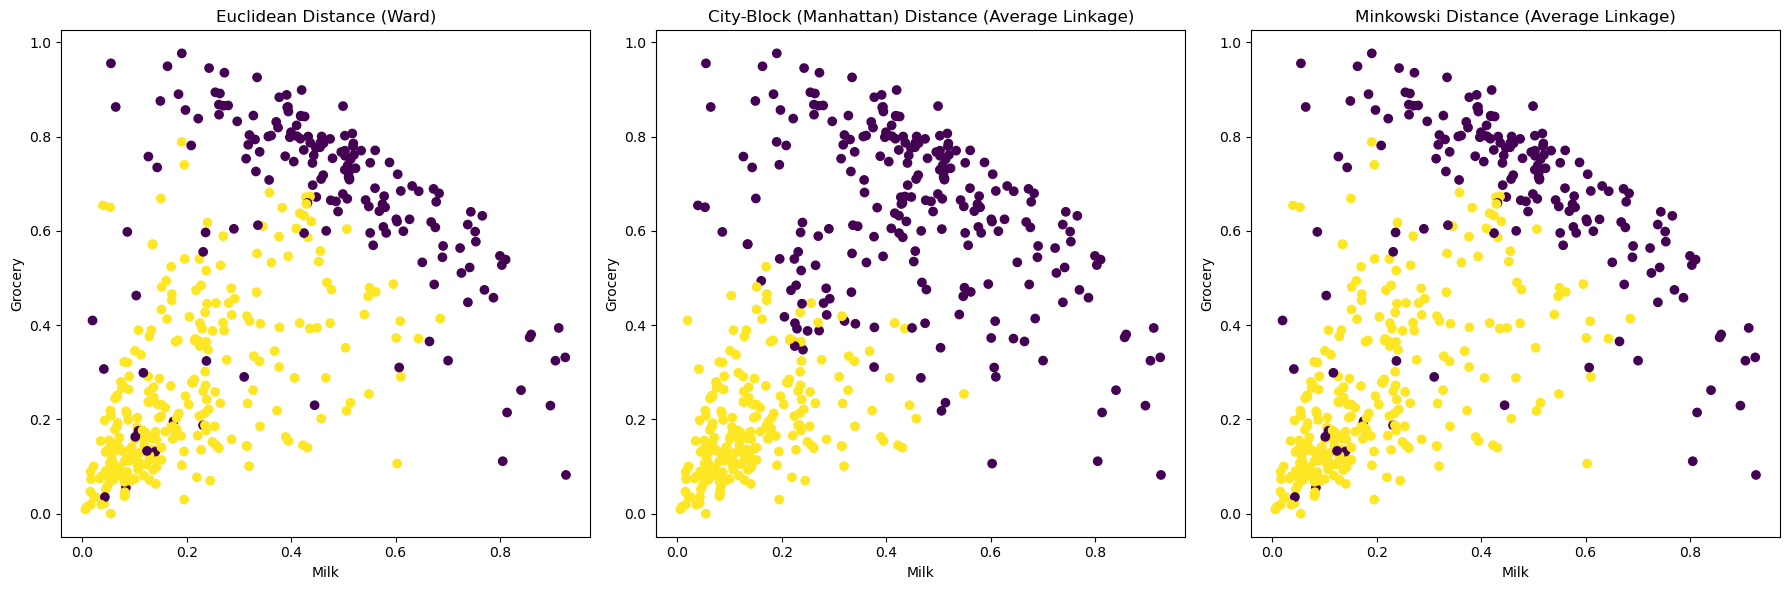

In [17]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Initialize the cluster using AgglomerativeClustering
# For Euclidean distance
cluster_euclidean = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
# For City-Block (Manhattan) distance
cluster_city_block = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')
# For Minkowski distance
cluster_minkowski = AgglomerativeClustering(n_clusters=2, affinity='minkowski', linkage='complete')  

# Call the method for training
labels_euclidean = cluster_euclidean.fit_predict(data_scaled)
labels_city_block = cluster_city_block.fit_predict(data_scaled)
labels_minkowski = cluster_minkowski.fit_predict(data_scaled)

# Set the size of the figure 
plt.figure(figsize=(18, 6))

# Plot for Euclidean distance
plt.subplot(1, 3, 1)
plt.title('Euclidean Distance (Ward)')
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=labels_euclidean)
plt.xlabel('Milk')
plt.ylabel('Grocery')

# Plot for City-Block (Manhattan) distance
plt.subplot(1, 3, 2)
plt.title('City-Block (Manhattan) Distance (Average Linkage)')
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=labels_city_block)
plt.xlabel('Milk')
plt.ylabel('Grocery')

# Plot for Minkowski distance
plt.subplot(1, 3, 3)
plt.title('Minkowski Distance (Average Linkage)')
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=labels_minkowski)
plt.xlabel('Milk')
plt.ylabel('Grocery')

plt.tight_layout()
plt.show()


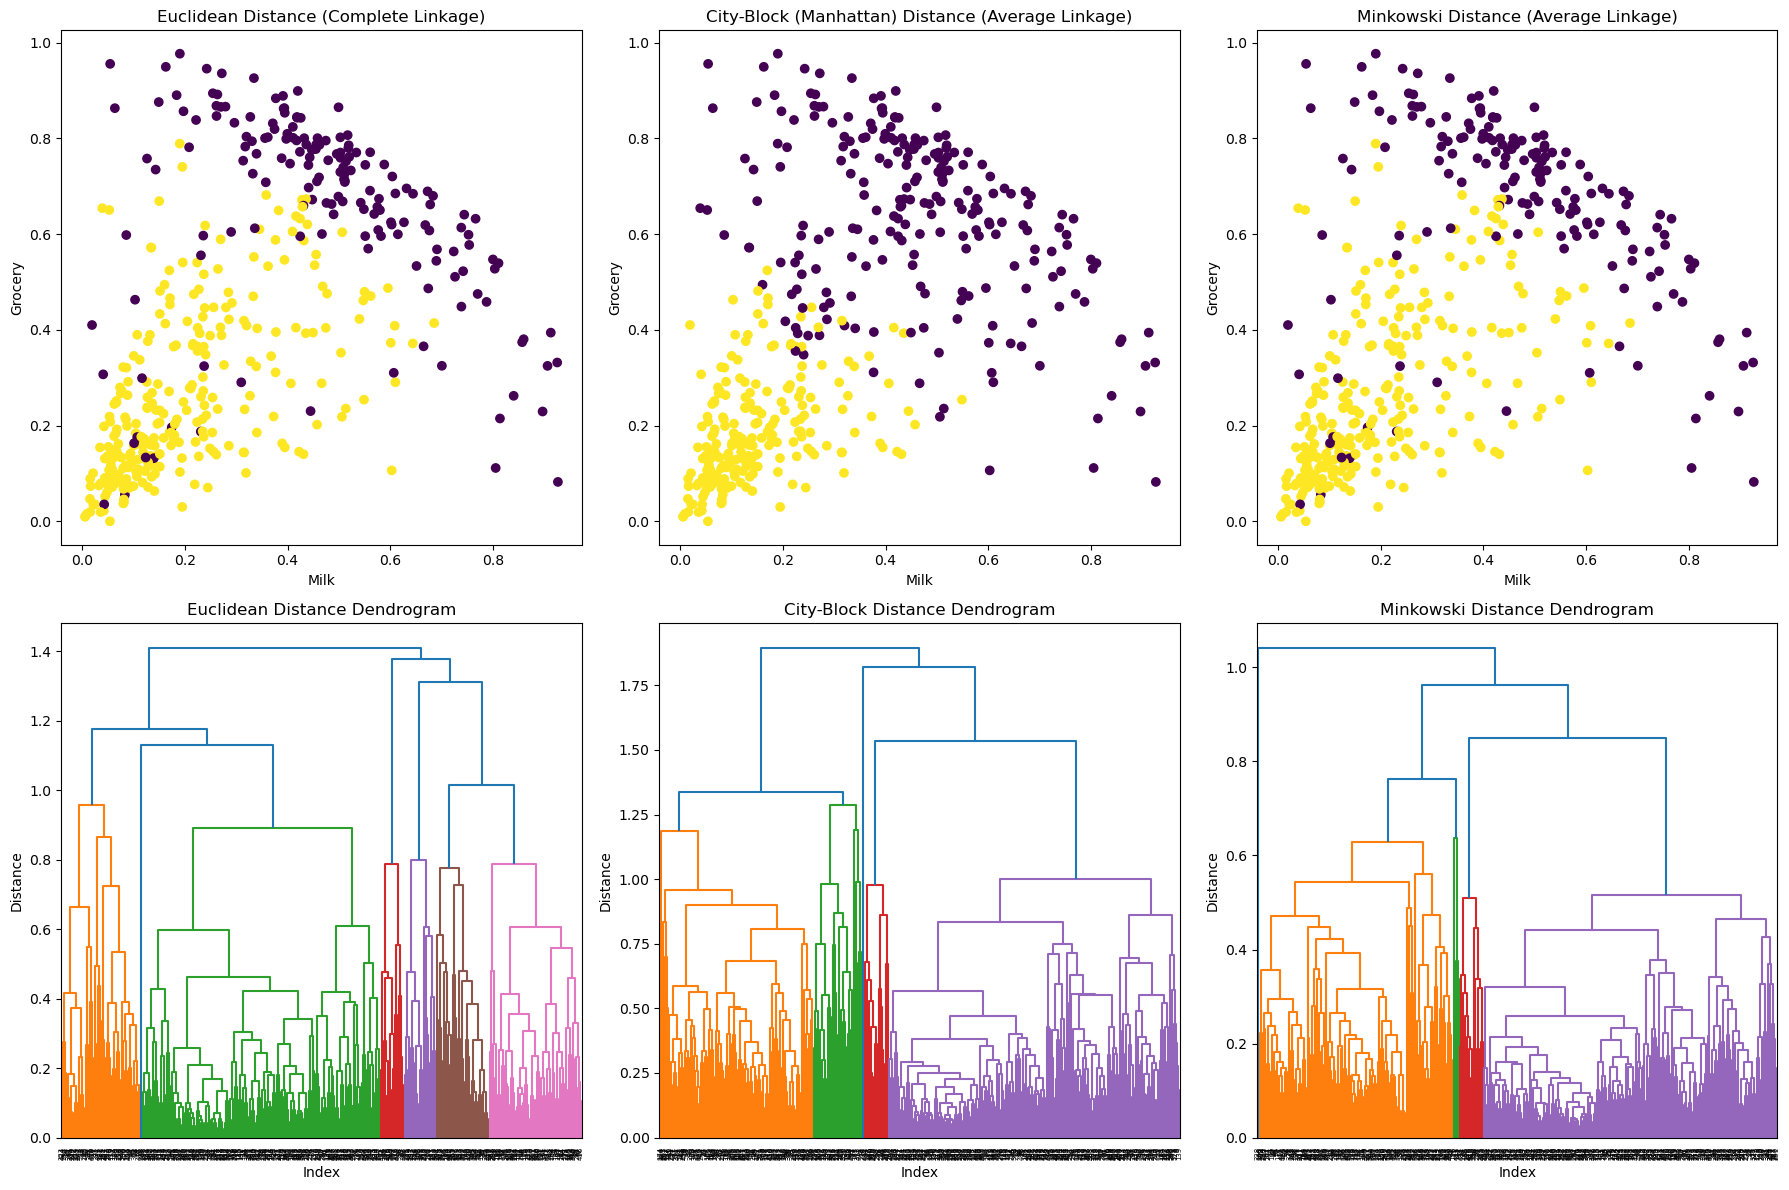

In [18]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Initialize the cluster using AgglomerativeClustering
# For Euclidean distance
cluster_euclidean = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
# For City-Block (Manhattan) distance
cluster_city_block = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')
# For Minkowski distance
cluster_minkowski = AgglomerativeClustering(n_clusters=2, affinity='minkowski', linkage='complete')  

# Call the method for training
labels_euclidean = cluster_euclidean.fit_predict(data_scaled)
labels_city_block = cluster_city_block.fit_predict(data_scaled)
labels_minkowski = cluster_minkowski.fit_predict(data_scaled)

# Compute linkage matrices
Z_euclidean = linkage(data_scaled, method='complete', metric='euclidean')
Z_city_block = linkage(data_scaled, method='average', metric='cityblock')
Z_minkowski = linkage(data_scaled, method='average', metric='minkowski')

# Set the size of the figure 
plt.figure(figsize=(18, 12))

# Plot for Euclidean distance
plt.subplot(2, 3, 1)
plt.title('Euclidean Distance (Complete Linkage)')
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=labels_euclidean)
plt.xlabel('Milk')
plt.ylabel('Grocery')

# Plot dendrogram for Euclidean distance
plt.subplot(2, 3, 4)
dendrogram(Z_euclidean, leaf_rotation=90)
plt.title('Euclidean Distance Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')

# Plot for City-Block (Manhattan) distance
plt.subplot(2, 3, 2)
plt.title('City-Block (Manhattan) Distance (Average Linkage)')
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=labels_city_block)
plt.xlabel('Milk')
plt.ylabel('Grocery')

# Plot dendrogram for City-Block distance
plt.subplot(2, 3, 5)
dendrogram(Z_city_block, leaf_rotation=90)
plt.title('City-Block Distance Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')

# Plot for Minkowski distance
plt.subplot(2, 3, 3)
plt.title('Minkowski Distance (Average Linkage)')
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=labels_minkowski)
plt.xlabel('Milk')
plt.ylabel('Grocery')

# Plot dendrogram for Minkowski distance
plt.subplot(2, 3, 6)
dendrogram(Z_minkowski, leaf_rotation=90)
plt.title('Minkowski Distance Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


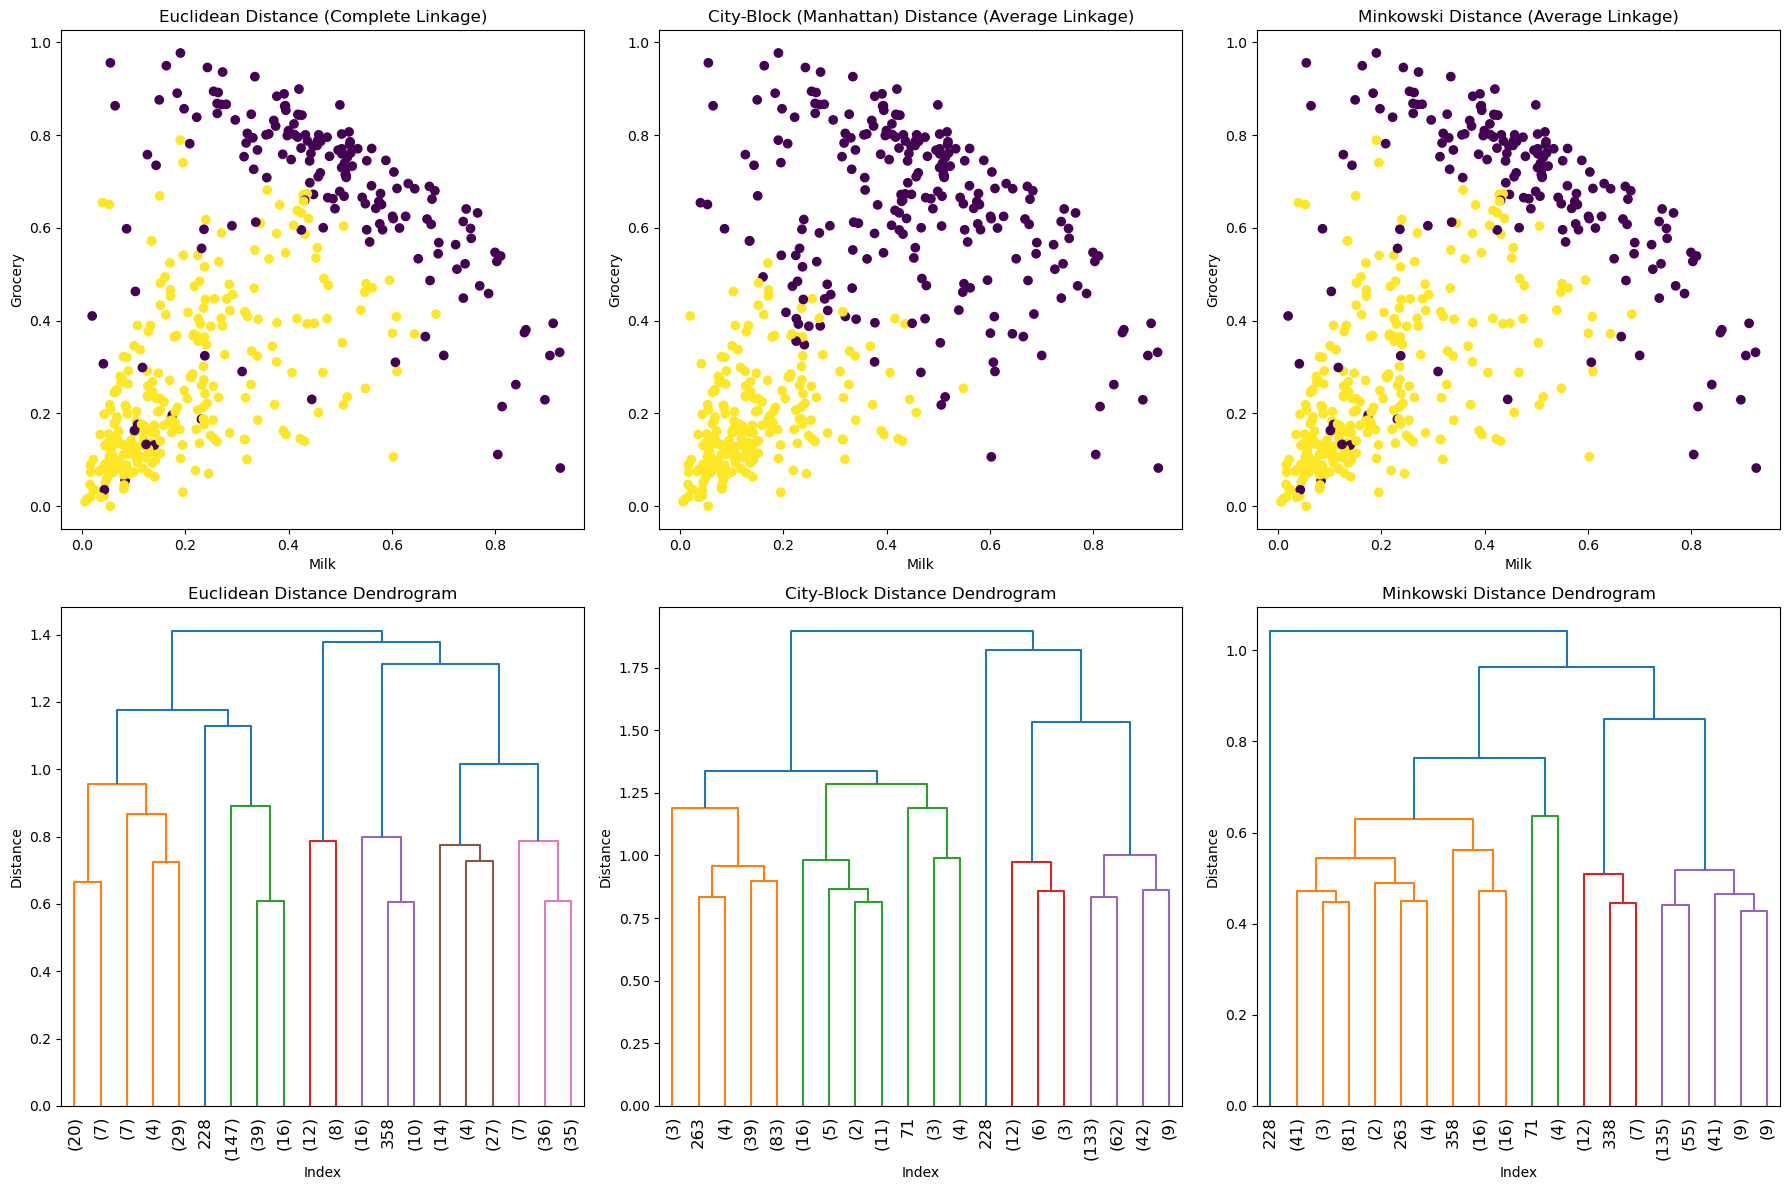

In [19]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Initialize the cluster using AgglomerativeClustering
# For Euclidean distance
cluster_euclidean = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
# For City-Block (Manhattan) distance
cluster_city_block = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')
# For Minkowski distance
cluster_minkowski = AgglomerativeClustering(n_clusters=2, affinity='minkowski', linkage='complete')  

# Call the method for training
labels_euclidean = cluster_euclidean.fit_predict(data_scaled)
labels_city_block = cluster_city_block.fit_predict(data_scaled)
labels_minkowski = cluster_minkowski.fit_predict(data_scaled)

# Compute linkage matrices
Z_euclidean = linkage(data_scaled, method='complete', metric='euclidean')
Z_city_block = linkage(data_scaled, method='average', metric='cityblock')
Z_minkowski = linkage(data_scaled, method='average', metric='minkowski')

# Set the size of the figure 
plt.figure(figsize=(18, 12))

# Plot for Euclidean distance
plt.subplot(2, 3, 1)
plt.title('Euclidean Distance (Complete Linkage)')
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=labels_euclidean)
plt.xlabel('Milk')
plt.ylabel('Grocery')

# Plot dendrogram for Euclidean distance
plt.subplot(2, 3, 4)
dendrogram(Z_euclidean, leaf_rotation=90, truncate_mode='lastp', p=20)  # Show only 10 labels
plt.title('Euclidean Distance Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')

# Plot for City-Block (Manhattan) distance
plt.subplot(2, 3, 2)
plt.title('City-Block (Manhattan) Distance (Average Linkage)')
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=labels_city_block)
plt.xlabel('Milk')
plt.ylabel('Grocery')

# Plot dendrogram for City-Block distance
plt.subplot(2, 3, 5)
dendrogram(Z_city_block, leaf_rotation=90, truncate_mode='lastp', p=20)  # Show only 10 labels
plt.title('City-Block Distance Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')

# Plot for Minkowski distance
plt.subplot(2, 3, 3)
plt.title('Minkowski Distance (Average Linkage)')
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=labels_minkowski)
plt.xlabel('Milk')
plt.ylabel('Grocery')

# Plot dendrogram for Minkowski distance
plt.subplot(2, 3, 6)
dendrogram(Z_minkowski, leaf_rotation=90, truncate_mode='lastp', p=20)  # Show only 10 labels
plt.title('Minkowski Distance Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

## Task: 
* Perform hierarchical clustering on the dataset, 'heart_disease_data.csv' and analyse the clusters based on the column characteristics. 

* Sources data set: https://archive.ics.uci.edu/dataset/45/heart+disease

## References 
Practical Machine Learning for Data Analysis Using Python, Abdulhamit Subasi, ISBN: 978-0-12-821379-7, Jun 07, 2020, Elsevier Science & Technology.